# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import talib
from sklearn.preprocessing import StandardScaler

def get_data(data):
    start = dt.datetime(2009, 1, 1)
    end = dt.datetime.now()
    df = web.DataReader(data,'yahoo', start, end)
    df.to_csv(data+'.csv')
    
get_data('AAPL')

# Reading df

In [2]:
df = pd.read_csv('{}.csv'.format('AAPL'))

# Getting info about the df

In [3]:
df.shape

(3374, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3374 non-null   object 
 1   High       3374 non-null   float64
 2   Low        3374 non-null   float64
 3   Open       3374 non-null   float64
 4   Close      3374 non-null   float64
 5   Volume     3374 non-null   float64
 6   Adj Close  3374 non-null   float64
dtypes: float64(6), object(1)
memory usage: 184.6+ KB


In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-12-31,3.133571,3.047857,3.070357,3.048214,6.075412e+08,2.606278
1,2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.771173
2,2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.888128
3,2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.840492
4,2009-01-07,3.303571,3.223571,3.278929,3.250357,7.530488e+08,2.779114


In [6]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3369,2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006
3370,2022-05-20,140.699997,132.610001,139.089996,137.589996,137194600.0,137.589996
3371,2022-05-23,143.259995,137.649994,137.789993,143.110001,117726300.0,143.110001
3372,2022-05-24,141.970001,137.330002,140.809998,140.360001,104132700.0,140.360001
3373,2022-05-25,141.789993,138.339996,138.429993,140.520004,92377800.0,140.520004


# Plotting the values of the parameters in the data

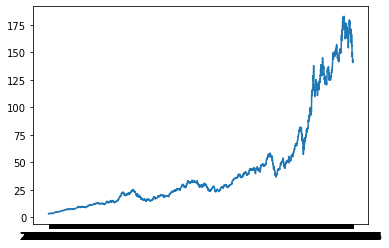

In [7]:
plt.plot( df["Date"],df["High"])
plt.show()

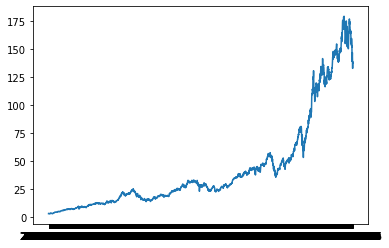

In [8]:
plt.plot( df["Date"],df["Low"])
plt.show()

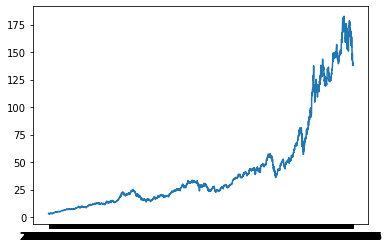

In [9]:
plt.plot( df["Date"],df["Open"])
plt.show()

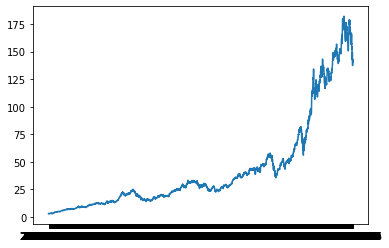

In [10]:
plt.plot( df["Date"],df["Close"])
plt.show()

## Removing unnecessry data

In [11]:
df = df.dropna()
df = df[['Date','Open', 'High', 'Low', 'Close']]

## calculating High - Low and Close - Open

In [12]:
df['high-low'] = df['High'] - df['Low']
df['Open-Close'] = df['Close'] - df['Open']

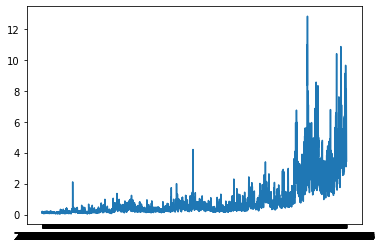

In [13]:
plt.plot( df["Date"],df["high-low"])
plt.show()

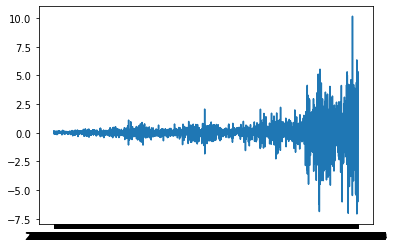

In [14]:
plt.plot( df["Date"],df["Open-Close"])
plt.show()

## calculating mean of previous 5 and 10 days

In [15]:
df['mean_5'] = df['Close'].rolling(window=5).mean()
df['mean_10'] = df['Close'].rolling(window=10).mean()

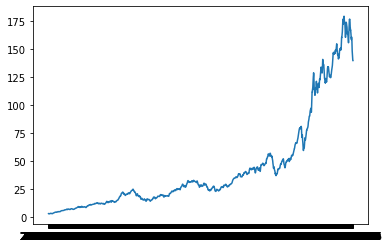

In [16]:
plt.plot( df["Date"],df["mean_5"])
plt.show()

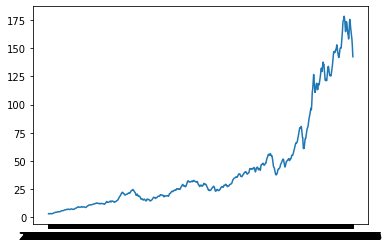

In [17]:
plt.plot( df["Date"],df["mean_10"])
plt.show()

## Calculating Exponentially Weighted Moving Average
### It is a type of moving average which places a greater weight on the most recent data points.

In [18]:
df['EWMA_12'] = df['Close'].ewm(span=12).mean()

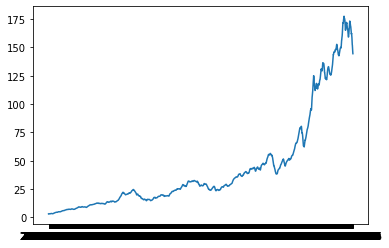

In [19]:
plt.plot( df["Date"],df["EWMA_12"])
plt.show()

## calculating standard deviation for past 5 and 10 days

In [20]:
df['std_5'] = df['Close'].rolling(window=5).std()
df['std_10'] = df['Close'].rolling(window=10).std()

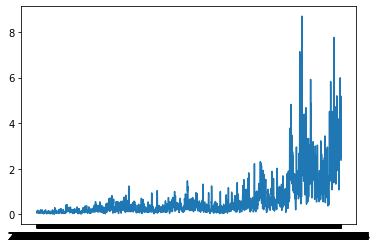

In [21]:
plt.plot( df["Date"],df["std_5"])
plt.show()

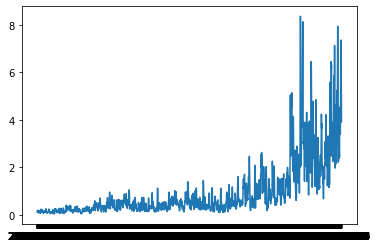

In [22]:
plt.plot( df["Date"],df["std_10"])
plt.show()

## calculating Relative Strength Index
### RSI is a momentum indicator , which ranges between between 0 to 100.
### an RSI value over 70 is considered Overbought, while a valie below 30 is considered Oversold.

In [23]:
df['RSI'] = talib.RSI(df['Close'].values, timeperiod=14)

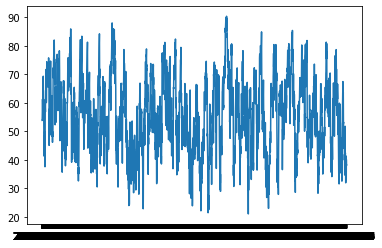

In [24]:
plt.plot( df["Date"],df["RSI"])
plt.show()

## calculating Williams %R
### It is a Momentum Indicator with values ranging from -100 and 0
### value above -20 is considered overbought and value below -80 is usually considered oversold.

In [25]:
df['Williams %R'] = talib.WILLR(df['High'].values, df['Low'].values, df['Close'].values, 7)

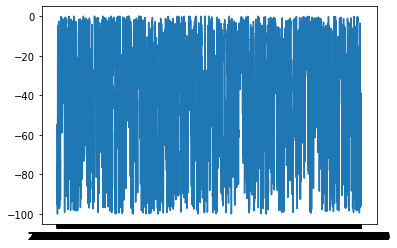

In [26]:
plt.plot( df["Date"],df["Williams %R"])
plt.show()

## Calculating Parabolic Stop and Reverse for the data
### It is used to determine the price direction

In [27]:
df['SAR'] = talib.SAR(np.array(df['High']), np.array(df['Low']), 0.2, 0.2)

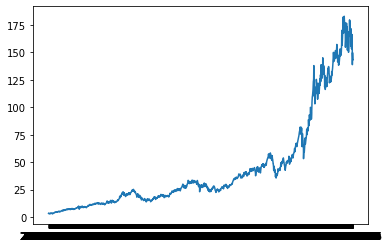

In [28]:
plt.plot( df["Date"],df["SAR"])
plt.show()

## calculating the Average Directional Index for the data
### It is used to determine the strength of a particular trend

In [29]:
df['ADX'] = talib.ADX(np.array(df['High']), np.array(df['Low']), np.array(df['Close']), 10)

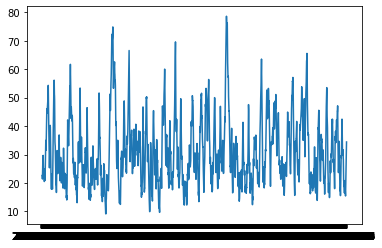

In [30]:
plt.plot( df["Date"],df["ADX"])
plt.show()

## calculating when to buy or sell stock
### when mean of 5 close value of previous day is greaterthan closing value of current day buy the stock Price_Rise =1
### when mean of 5 close value of previous day is lessthan closing value of current day sell the stock Price_Rise =0

In [31]:
df['Price_Rise'] = np.where(df['mean_5'].shift(-1) > df['Close'], 1, 0)

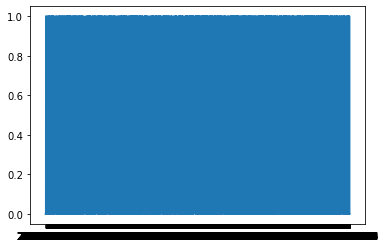

In [32]:
plt.plot( df["Date"],df["Price_Rise"])
plt.show()

## dropping the Date from the dataframe

In [33]:
df = df.drop(['Date'],axis=1)
df = df.dropna()
print(df.head())



        Open      High       Low     Close  high-low  Open-Close    mean_5  \
19  3.324643  3.369286  3.307143  3.321429  0.062143   -0.003214  3.256643   
20  3.307143  3.343571  3.214643  3.218929  0.128928   -0.088214  3.269286   
21  3.182143  3.285714  3.175000  3.268214  0.110714    0.086071  3.282643   
22  3.282857  3.335000  3.224286  3.320714  0.110714    0.037857  3.298714   
23  3.329286  3.437500  3.325000  3.341071  0.112500    0.011785  3.294071   

     mean_10   EWMA_12     std_5    std_10        RSI  Williams %R       SAR  \
19  3.110821  3.184817  0.085564  0.185217  59.075160   -12.746883  3.106912   
20  3.134929  3.190227  0.070216  0.181642  54.073480   -53.049962  3.164101   
21  3.167714  3.202537  0.059636  0.171950  56.002404   -41.058959  3.392857   
22  3.220500  3.221117  0.056115  0.116012  58.024835   -30.149287  3.349286   
23  3.258786  3.239912  0.049955  0.076169  58.815363   -36.734892  3.175000   

          ADX  Price_Rise  
19  22.636567         

In [49]:
df.count()

Open           3355
High           3355
Low            3355
Close          3355
high-low       3355
Open-Close     3355
mean_5         3355
mean_10        3355
EWMA_12        3355
std_5          3355
std_10         3355
RSI            3355
Williams %R    3355
SAR            3355
ADX            3355
Price_Rise     3355
dtype: int64

In [50]:
df.shape

(3355, 16)

### counting the number of 0 and 1 in Price_Rise

In [34]:
df[df['Price_Rise'] > 0]['Price_Rise'].count()

1463

In [35]:
df[df['Price_Rise'] <1]['Price_Rise'].count()

1892

# Splitting the data into train and test sets

In [36]:
def split_data(df):
    
    X = df.iloc[:, 4:-1]
    y = df.iloc[:, -1]
    
    split = int(len(df)*0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

split_data(df)

(array([[-1.06324044, -0.01532006, -1.57346108, ...,  0.94982809,
         -1.57954224, -0.67725537],
        [-0.88090657, -0.26338978, -1.5725341 , ..., -0.34295526,
         -1.57534598, -0.69288037],
        [-0.93063381,  0.24525488, -1.57155478, ...,  0.04167462,
         -1.55856093, -0.76781832],
        ...,
        [ 2.38457285, -2.4501602 ,  2.21248891, ..., -1.6097231 ,
          2.2867952 , -0.46835612],
        [ 1.74298176,  1.80350537,  2.2061101 , ...,  0.03591119,
          2.27380787, -0.44847824],
        [ 0.20726241, -0.08619871,  2.20218748, ..., -0.51646439,
          2.27380787, -0.43058815]]),
 array([[ 1.27885825, -1.2608706 ,  2.20618343, ..., -1.0349186 ,
          2.25564737, -0.50846192],
        [ 1.35393828,  2.23398757,  2.22542979, ...,  1.09571066,
          2.17566822, -0.44841886],
        [ 1.51092001, -0.35616439,  2.25076168, ...,  0.30781969,
          2.17823635, -0.29674137],
        ...,
        [14.08334121, 15.52032022,  8.57141289, ...,  

# Training algorithms

##  SVM

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
from sklearn import svm
from collections import Counter

def svm_linear(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = svm.SVC(kernel = 'linear')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)  
  
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1]))  
    
svm_linear(df)    

accuracy: 0.8375558867362146
predicted class counts: Counter({0: 381, 1: 290})
[[327  55]
 [ 54 235]]
Precision: 0.8582677165354331
Recall: 0.856020942408377


In [39]:
def svm_poly(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = svm.SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1]))  
    
svm_poly(df)   

accuracy: 0.7511177347242921
predicted class counts: Counter({0: 417, 1: 254})
[[316  66]
 [101 188]]
Precision: 0.7577937649880095
Recall: 0.8272251308900523


In [40]:
def svm_rbf(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = svm.SVC(kernel = 'rbf')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm) 
   
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 
    
svm_rbf(df)  

accuracy: 0.5380029806259314
predicted class counts: Counter({1: 569, 0: 102})
[[ 87 295]
 [ 15 274]]
Precision: 0.8529411764705882
Recall: 0.22774869109947643


## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def knn(data):
    X_train, X_test, y_train, y_test = split_data(data)
    clf = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm) 
    
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 

knn(df)
    

accuracy: 0.7078986587183308
predicted class counts: Counter({1: 363, 0: 308})
[[247 135]
 [ 61 228]]
Precision: 0.801948051948052
Recall: 0.6465968586387435


## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
def linear(data):
    
    X_train, X_test, y_train, y_test = split_data(data)
    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm) 
   
    print("Precision:",cm[0][0]/(cm[0][0]+cm[1][0]))
    print("Recall:",cm[0][0]/(cm[0][0]+cm[0][1])) 

linear(df)

accuracy: 0.8375558867362146
predicted class counts: Counter({0: 391, 1: 280})
[[332  50]
 [ 59 230]]
Precision: 0.8491048593350383
Recall: 0.8691099476439791
